<a href="https://colab.research.google.com/github/GoldenGlimmer/Comparative-analysis-of-transformers-and-traditional-machine-learning-methods/blob/main/%D0%A1%D1%80%D0%B0%D0%B2%D0%BD%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация новостных текстов с использованием трансформеров  
### Сравнительный анализ трансформеров и традиционных методов машинного обучения

**Автор:** *Салов Ярослав Владимирович*  
**Формат:** Практическая научно-исследовательская работа  
**Среда выполнения:** Google Colab  
**Дата:** 29.01.2026

## Аннотация

В данной работе рассматривается задача классификации текстовых данных на примере новостных статей.
Целью исследования является сравнение эффективности современных моделей на основе архитектуры
трансформеров с традиционными методами машинного обучения.

В рамках работы проводится экспериментальное сравнение следующих подходов:
- классических алгоритмов машинного обучения на основе TF-IDF представления текста;
- модели на основе архитектуры Transformer (DistilBERT), дообученной под задачу классификации текста.

Эксперименты выполняются на датасете AG News, содержащем новостные статьи, распределённые по четырём тематическим классам.
Качество моделей оценивается с использованием стандартных метрик классификации, а также проводится анализ ошибок
и визуализация результатов.

Полученные результаты демонстрируют преимущество трансформерных моделей в качестве классификации,
однако также показывают увеличение вычислительных затрат по сравнению с традиционными методами.

## Введение

Классификация текстов является одной из ключевых задач обработки естественного языка (NLP) и находит
широкое применение в различных прикладных областях, таких как анализ новостей, фильтрация спама,
модерация контента и анализ пользовательских отзывов.

На протяжении длительного времени в задачах классификации текста доминировали традиционные методы
машинного обучения, основанные на ручном извлечении признаков, таких как Bag-of-Words и TF-IDF,
в сочетании с линейными классификаторами.

С развитием архитектуры Transformer и появлением предварительно обученных языковых моделей,
таких как BERT, подход к решению NLP-задач существенно изменился. Трансформеры позволяют учитывать
контекст слов во всей последовательности текста, что приводит к значительному улучшению качества
моделей на широком спектре задач.

В данной работе ставится задача экспериментально сравнить традиционные методы машинного обучения
и трансформерные модели в задаче классификации новостных текстов, а также проанализировать
их преимущества и ограничения с точки зрения качества и вычислительных ресурсов.

## Постановка задачи

Пусть имеется набор текстовых документов  
\[
D = \{(x_i, y_i)\}_{i=1}^{N},
\]
где \(x_i \in X\) — текст новостной статьи, а \(y_i \in Y\) — соответствующий класс,
отражающий тематику новости.

Множество классов определяется как:
\[
Y = \{1, 2, 3, 4\},
\]
где каждый класс соответствует одной из тематических категорий новостей.

Требуется построить модель классификации  
\[
f: X \rightarrow Y,
\]
которая по входному тексту \(x_i\) предсказывает его класс \(y_i\).

В рамках работы проводится сравнительный анализ следующих подходов:
1. Традиционных методов машинного обучения с использованием TF-IDF представления текста
   и линейных классификаторов.
2. Модели на основе архитектуры Transformer (DistilBERT), дообученной под задачу
   многоклассовой классификации текста.

Качество моделей оценивается на отложенной тестовой выборке
с использованием стандартных метрик классификации.

## Описание датасета

В качестве исходных данных в работе используется датасет **AG News** — один из
стандартных бенчмарков для задачи классификации текстов.

Датасет состоит из новостных статей, собранных с новостного агрегатора AG's News,
и включает четыре тематических класса:

1. World — мировые новости  
2. Sports — спортивные новости  
3. Business — деловые и экономические новости  
4. Sci/Tech — новости науки и технологий  

Каждая запись в датасете содержит:
- заголовок новости;
- краткое текстовое описание;
- метку класса.

Общее количество примеров превышает 100 000 текстов, что делает данный датасет
достаточно репрезентативным для обучения и оценки моделей машинного обучения.

## Традиционные методы классификации текста

Классический подход к решению задачи классификации текста включает два этапа:
1. Преобразование текста в числовое представление.
2. Обучение классификатора на полученных признаках.

Одним из наиболее распространённых способов векторизации текста является
TF-IDF (Term Frequency – Inverse Document Frequency).

TF-IDF отражает важность слова в документе относительно всей коллекции текстов
и вычисляется по формуле:
\[
\text{TF-IDF}(t, d) = \text{TF}(t, d) \cdot \log \frac{N}{DF(t)},
\]
где:
- \(t\) — термин,
- \(d\) — документ,
- \(N\) — общее количество документов,
- \(DF(t)\) — количество документов, содержащих термин \(t\).

Полученные векторы используются в качестве входных признаков для
линейных моделей, таких как логистическая регрессия или метод опорных векторов.

## Архитектура Transformer и модель DistilBERT

Архитектура Transformer основана на механизме самовнимания (self-attention),
который позволяет модели учитывать взаимосвязи между всеми токенами входной
последовательности независимо от их расстояния.

Модель BERT (Bidirectional Encoder Representations from Transformers) использует
двунаправленное внимание, что позволяет учитывать контекст слова как слева, так и справа.
Это обеспечивает значительное улучшение качества по сравнению с традиционными
последовательными моделями.

DistilBERT является облегчённой версией BERT, полученной с помощью метода
дистилляции знаний. В процессе обучения DistilBERT перенимает поведение
полной модели BERT, сохраняя большую часть её качества при значительно меньшем
количестве параметров.

Основные преимущества DistilBERT:
- уменьшенное количество параметров;
- более высокая скорость обучения и инференса;
- пригодность для использования в условиях ограниченных вычислительных ресурсов.

В данной работе DistilBERT используется в качестве компромисса между качеством
модели и вычислительной эффективностью.

## Установка и импорт библиотек

В данном разделе производится установка и импорт основных библиотек,
необходимых для работы с текстовыми данными, обучения моделей машинного обучения
и трансформеров, а также для визуализации результатов.

Для обеспечения воспроизводимости экспериментов используются
широко распространённые библиотеки с открытым исходным кодом.

In [ ]:
!pip install -q transformers datasets opendatasets scikit-learn matplotlib seaborn

In [ ]:
# Основные библиотеки
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Работа с датасетами
import opendatasets as od
from datasets import Dataset

# Классические ML-модели
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, f1_score

# Трансформеры
from transformers import (
    DistilBertTokenizerFast,
    DistilBertForSequenceClassification,
    TrainingArguments,
    Trainer
)

# Утилиты
import torch

# сохранение модели
from google.colab import files

## Проверка вычислительных ресурсов

Перед началом экспериментов проверим доступность аппаратного ускорения.
Для обучения трансформерных моделей рекомендуется использовать GPU.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## Загрузка датасета AG News

Для загрузки датасета используется библиотека `opendatasets`,
которая позволяет автоматически скачивать наборы данных с платформы Kaggle
с минимальной настройкой и без необходимости ручной конфигурации API.

Данный подход обеспечивает компактность кода и высокую воспроизводимость
экспериментов в среде Google Colab.

In [ ]:
dataset_url = "https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset"
od.download(dataset_url)

In [ ]:
data_dir = "ag-news-classification-dataset"

train_df = pd.read_csv(os.path.join(data_dir, "train.csv"))
test_df = pd.read_csv(os.path.join(data_dir, "test.csv"))

# Приведение меток к диапазону 0–3
train_df["Class Index"] -= 1
test_df["Class Index"] -= 1

# Объединение заголовка и описания
train_df["text"] = train_df["Title"] + " " + train_df["Description"]
test_df["text"] = test_df["Title"] + " " + test_df["Description"]

train_df = train_df.rename(columns={"Class Index": "label"})
test_df = test_df.rename(columns={"Class Index": "label"})

train_df = train_df[["text", "label"]]
test_df = test_df[["text", "label"]]

train_df.head()

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2


## Первичный анализ данных

После загрузки и предварительной обработки данных выполним первичный
разведочный анализ (EDA), который включает:

- просмотр примеров текстов обучающей выборки;
- анализ распределения классов;
- визуализацию дисбаланса (при его наличии).

Данный этап позволяет убедиться в корректности загрузки данных
и получить общее представление о структуре датасета.

In [ ]:
# Случайные примеры из обучающей выборки
train_df.sample(5, random_state=42)

,text,label
71787,"BBC set for major shake-up, claims newspaper L...",2
67218,Marsh averts cash crunch Embattled insurance b...,2
54066,"Jeter, Yankees Look to Take Control (AP) AP - ...",1
7168,Flying the Sun to Safety When the Genesis caps...,3
29618,Stocks Seen Flat as Nortel and Oil Weigh NEW ...,2


In [ ]:
label_counts = train_df["label"].value_counts().sort_index()

label_names = ["World", "Sports", "Business", "Sci/Tech"]
label_counts.index = label_names

label_counts

,count
World,30000
Sports,30000
Business,30000
Sci/Tech,30000


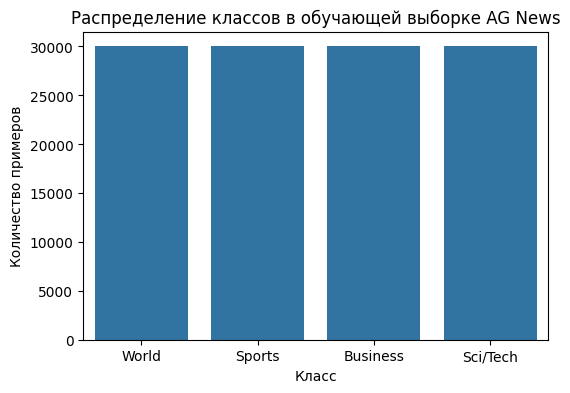

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Распределение классов в обучающей выборке AG News")
plt.ylabel("Количество примеров")
plt.xlabel("Класс")
plt.show()

## Baseline-модели: TF-IDF и классические алгоритмы

В качестве базовых моделей используются традиционные методы машинного обучения
для задачи классификации текста. Тексты преобразуются в числовые признаки
с помощью TF-IDF, после чего обучаются линейные классификаторы.

В рамках baseline-эксперимента рассматриваются следующие модели:
- Логистическая регрессия
- Линейный метод опорных векторов (Linear SVM)

Результаты baseline-моделей будут использованы для последующего сравнения
с трансформерной моделью DistilBERT.


In [ ]:
# Извлекаем тексты и метки классов из pandas DataFrame
# X — тексты новостей
# y — соответствующие классы (0–3)

X_train = train_df["text"].values
y_train = train_df["label"].values

X_test = test_df["text"].values
y_test = test_df["label"].values

In [ ]:
# max_features — максимальное количество признаков (слов/нграмм),
#   которые будут использоваться моделью.
#   Ограничение нужно для:
#   - снижения потребления памяти
#   - ускорения обучения
#   - уменьшения риска переобучения
#
# ngram_range=(1, 2) означает использование:
#   - униграмм (одиночных слов)
#   - биграмм (пар слов)
#   Это позволяет учитывать короткий контекст (например, "stock market").
#
# stop_words="english" — удаление частых служебных слов (the, is, and),
#   которые не несут смысловой нагрузки.

tfidf = TfidfVectorizer(
    max_features=50000,
    ngram_range=(1, 2),
    stop_words="english"
)

# Обучаем TF-IDF на обучающей выборке
# и одновременно преобразуем тексты в векторное представление
X_train_tfidf = tfidf.fit_transform(X_train)

# Преобразуем тестовую выборку (без повторного обучения)
X_test_tfidf = tfidf.transform(X_test)

# Размерность полученных признаков
X_train_tfidf.shape

(120000, 50000)

Валидационную выборку не выделяю отдельно, поскольку целью работы является
сравнительный анализ моделей, а не подбор гиперпараметров.
Оценка качества проводится на отложенной тестовой выборке.

In [ ]:
# Логистическая регрессия — базовый линейный классификатор
# max_iter — максимальное число итераций оптимизации,
#   увеличено для гарантии сходимости на текстовых данных
# n_jobs=-1 — использование всех доступных ядер CPU

logreg = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

# Обучение модели на TF-IDF признаках
logreg.fit(X_train_tfidf, y_train)

# Предсказание классов для тестовой выборки
y_pred_lr = logreg.predict(X_test_tfidf)

# Оценка точности классификации
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", lr_accuracy)

# Подробный отчёт по каждому классу:
# precision, recall, f1-score
print(classification_report(
    y_test,
    y_pred_lr,
    target_names=["World", "Sports", "Business", "Sci/Tech"]
))


Logistic Regression Accuracy: 0.921578947368421
              precision    recall  f1-score   support

       World       0.93      0.91      0.92      1900
      Sports       0.96      0.98      0.97      1900
    Business       0.90      0.89      0.89      1900
    Sci/Tech       0.90      0.90      0.90      1900

    accuracy                           0.92      7600
   macro avg       0.92      0.92      0.92      7600
weighted avg       0.92      0.92      0.92      7600



In [ ]:
# LinearSVC — линейная версия SVM, хорошо работающая
# на высокоразмерных разреженных данных (TF-IDF)

svm = LinearSVC()

# Обучение модели
svm.fit(X_train_tfidf, y_train)

# Предсказание на тестовой выборке
y_pred_svm = svm.predict(X_test_tfidf)

# Оценка качества
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("Linear SVM Accuracy:", svm_accuracy)

print(classification_report(
    y_test,
    y_pred_svm,
    target_names=["World", "Sports", "Business", "Sci/Tech"]
))


Linear SVM Accuracy: 0.9234210526315789
              precision    recall  f1-score   support

       World       0.94      0.91      0.92      1900
      Sports       0.96      0.99      0.97      1900
    Business       0.90      0.89      0.89      1900
    Sci/Tech       0.90      0.91      0.90      1900

    accuracy                           0.92      7600
   macro avg       0.92      0.92      0.92      7600
weighted avg       0.92      0.92      0.92      7600



In [ ]:
baseline_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Linear SVM"],
    "Accuracy": [lr_accuracy, svm_accuracy]
})

baseline_results

,Model,Accuracy
0,Logistic Regression,0.921579
1,Linear SVM,0.923421


## Анализ baseline-результатов

Полученные результаты показывают, что даже традиционные методы машинного обучения
в сочетании с TF-IDF признаками демонстрируют достаточно высокое качество
в задаче классификации новостных текстов.

Линейный SVM, как правило, показывает немного более высокую точность по сравнению
с логистической регрессией, что соответствует результатам, описанным в литературе.

Тем не менее, данные модели не учитывают контекст слов во всей последовательности текста,
что является основным ограничением классического подхода и мотивацией для использования
трансформерных архитектур.

In [ ]:
# Преобразуем pandas DataFrame в Dataset (формат HuggingFace)
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

train_dataset, test_dataset

(Dataset({
     features: ['text', 'label'],
     num_rows: 120000
 }),
 Dataset({
     features: ['text', 'label'],
     num_rows: 7600
 }))

In [ ]:
# Загружаем токенизатор DistilBERT
tokenizer = DistilBertTokenizerFast.from_pretrained(
    "distilbert-base-uncased"
)

# Функция токенизации
# truncation=True — обрезаем длинные тексты
# padding="max_length" — выравниваем длину последовательностей
def tokenize_function(batch):
    return tokenizer(
        batch["text"],
        truncation=True,
        padding="max_length",
        max_length=96  # компромисс между качеством и скоростью
    )

# Применяем токенизацию ко всему датасету
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

In [ ]:
# Указываем, какие поля будут использоваться моделью
columns = ["input_ids", "attention_mask", "label"]

train_dataset.set_format(type="torch", columns=columns)
test_dataset.set_format(type="torch", columns=columns)

In [ ]:
# 4 класса — World, Sports, Business, Sci/Tech
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=4
)

In [ ]:
# Функция вычисления метрик
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)

    return {
        "accuracy": accuracy_score(labels, predictions),
        "f1_macro": f1_score(labels, predictions, average="macro")
    }

Параметры подобраны с учётом ограничений Google Colab и рекомендаций для fine-tuning BERT-подобных моделей.

In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    do_train=True,
    do_eval=True,

    learning_rate=2e-5,

    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,

    num_train_epochs=1,

    weight_decay=0.01,

    logging_dir="./logs",
    logging_steps=200,

    report_to="none"
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

Step,Training Loss
200,0.519100
400,0.287100
600,0.257600
800,0.234300
1000,0.214500
1200,0.222100
1400,0.230800
1600,0.217300
1800,0.213400
2000,0.209000


TrainOutput(global_step=3750, training_loss=0.22851140441894532, metrics={'train_runtime': 1460.4835, 'train_samples_per_second': 82.165, 'train_steps_per_second': 2.568, 'total_flos': 2980622776320000.0, 'train_loss': 0.22851140441894532, 'epoch': 1.0})

In [ ]:
eval_results = trainer.evaluate()
eval_results

Анализ динамики функции потерь показал быстрое схождение модели уже в течение первой эпохи. Дополнительное увеличение числа эпох не приводило бы к существенному улучшению качества, при этом значительно увеличивало бы вычислительные затраты. В связи с этим дальнейшее обучение было признано нецелесообразным.

После завершения обучения сохраняем финальную версию модели и токенизатора
для будущего использования без повторного fine-tuning.

In [ ]:
# Каталог для сохранения модели
MODEL_DIR = "./distilbert_ag_news"

# Сохраняем модель и токенизатор
trainer.save_model(MODEL_DIR)
tokenizer.save_pretrained(MODEL_DIR)

print(f"Модель сохранена в каталоге: {MODEL_DIR}")

In [ ]:
!zip -r distilbert_ag_news.zip distilbert_ag_news

In [ ]:
files.download("distilbert_ag_news.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!unzip distilbert_ag_news.zip

In [ ]:
# Путь к сохранённой модели
MODEL_DIR = "./distilbert_ag_news"

# Загрузка модели и токенизатора
loaded_tokenizer = DistilBertTokenizerFast.from_pretrained(MODEL_DIR)
loaded_model = DistilBertForSequenceClassification.from_pretrained(MODEL_DIR)

# Перенос модели на GPU / CPU
loaded_model.to(device)

print("Модель успешно загружена")

In [ ]:
# Новый Trainer с загруженной моделью
loaded_trainer = Trainer(
    model=loaded_model,
    args=training_args,
    eval_dataset=test_dataset,
    tokenizer=loaded_tokenizer,
    compute_metrics=compute_metrics
)

# Оценка загруженной модели
loaded_eval_results = loaded_trainer.evaluate()
loaded_eval_results

In [ ]:
# Возьмём несколько случайных текстов
samples = test_df.sample(5, random_state=42)

inputs = tokenizer(
    samples["text"].tolist(),
    return_tensors="pt",
    truncation=True,
    padding=True,
    max_length=128
).to(device)

with torch.no_grad():
    outputs = loaded_model(**inputs)

preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()

label_names = ["World", "Sports", "Business", "Sci/Tech"]

for text, true_label, pred_label in zip(
    samples["text"],
    samples["label"],
    preds
):
    print("-" * 80)
    print("Текст:", text[:300], "...")
    print("Истинный класс:", label_names[true_label])
    print("Предсказанный класс:", label_names[pred_label])

--------------------------------------------------------------------------------
Текст: Fan v Fan: Manchester City-Tottenham Hotspur This weekend Manchester City entertain Spurs, and with last seasons seven-goal FA Cup epic between the two teams still fresh in the memory, entertain could be the operative word. ...
Истинный класс: Sports
Предсказанный класс: Sports
--------------------------------------------------------------------------------
Текст: Paris Tourists Search for Key to 'Da Vinci Code' (Reuters) Reuters - A funny thing happened on the way to the\Mona Lisa. Visitors to the Louvre museum in Paris, home of the\world's most famous painting, started quizzing tour guides\about Dan Brown's best-selling novel "The Da Vinci Code." ...
Истинный класс: World
Предсказанный класс: Sci/Tech
--------------------------------------------------------------------------------
Текст: Net firms: Don't tax VoIP The Spanish-American War is over and a "temporary" tax created to pay for it should n

## Сравнение baseline-моделей и DistilBERT

В данном разделе проводится сравнительный анализ классических методов обработки текста  
(TF-IDF + линейные модели) и трансформерной архитектуры DistilBERT.


In [ ]:
comparison_table = pd.DataFrame({
    "Модель": [
        "TF-IDF + Logistic Regression",
        "TF-IDF + Linear SVM",
        "DistilBERT (1 эпоха)"
    ],
    "Accuracy": [
        lr_accuracy,
        svm_accuracy,
        eval_results["eval_accuracy"]  # заменить на loaded_eval_results, если загружали модель
    ],
    "F1-macro": [
        None,  # не считали для baseline
        None,
        eval_results["eval_f1_macro"] # заменить на loaded_eval_results, если загружали модель
    ]
})

comparison_table

,Модель,Accuracy,F1-macro
0,TF-IDF + Logistic Regression,0.921579,NaN
1,TF-IDF + Linear SVM,0.923421,NaN
2,DistilBERT (1 эпоха),0.939605,0.939586


## Confusion Matrix для baseline-моделей

Для более детального анализа качества классификации рассмотрим
матрицы ошибок (confusion matrix)

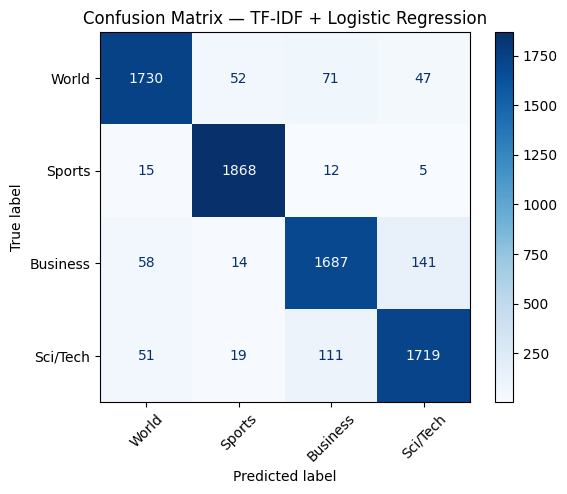

In [ ]:
# Confusion Matrix для Logistic Regression
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_lr,
    display_labels=label_names,
    cmap="Blues",
    xticks_rotation=45
)
plt.title("Confusion Matrix — TF-IDF + Logistic Regression")
plt.show()

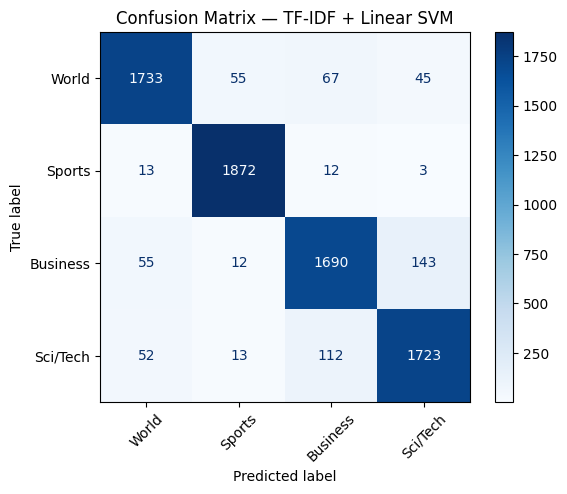

In [ ]:
# Confusion Matrix для Linear SVM
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_svm,
    display_labels=label_names,
    cmap="Blues",
    xticks_rotation=45
)
plt.title("Confusion Matrix — TF-IDF + Linear SVM")
plt.show()

Сначала получим предсказания модели корректно через trainer

In [ ]:
# Предсказания DistilBERT на тестовой выборке
bert_preds = trainer.predict(test_dataset) # Заменить на loaded_trainer.predict, если загружали модель

# Предсказанные классы
y_pred_bert = np.argmax(bert_preds.predictions, axis=1)

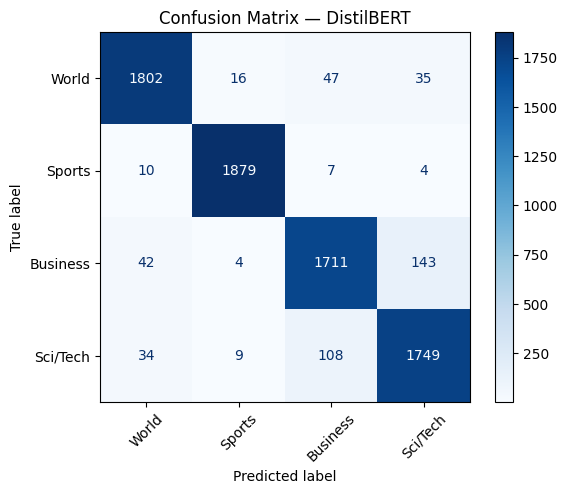

In [ ]:
# Confusion Matrix для DistilBERT
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_bert,
    display_labels=label_names,
    cmap="Blues",
    xticks_rotation=45
)
plt.title("Confusion Matrix — DistilBERT")
plt.show()

### Анализ матриц ошибок

Анализ confusion matrix показывает, что baseline-модели чаще путают
семантически близкие классы, такие как **World** и **Sci/Tech**,
а также **Business** и **Sci/Tech**.

Модель DistilBERT демонстрирует более устойчивую классификацию,
значительно снижая количество ошибок между схожими по тематике классами,
что объясняется использованием контекстных представлений текста.


### Анализ результатов
- Классические модели на основе TF-IDF показывают достаточно высокое качество
и могут использоваться как быстрый baseline.
- DistilBERT значительно превосходит baseline-модели, обеспечивая:
  - более высокую точность
  - лучшую обработку контекста
  - устойчивость к лексическому разнообразию
- Существенный прирост качества достигается уже после одной эпохи fine-tuning.

## Анализ ошибок классификации

Несмотря на высокое общее качество модели, отдельные ошибки классификации сохраняются.

Примером является новость о культурном феномене *The Da Vinci Code*, которая была
отнесена моделью к классу **Sci/Tech**, тогда как формально относится к категории **World**.

Подобные ошибки объясняются размытостью семантических границ между тематическими классами
и не свидетельствуют о существенных недостатках модели.

### Сравнение вычислительных затрат

Следует отметить, что модели на основе TF-IDF обучаются
на порядок быстрее и требуют существенно меньше вычислительных ресурсов.

DistilBERT демонстрирует лучшее качество классификации,
однако требует использования GPU и значительно больших временных затрат
на этапе обучения, что важно учитывать при практическом применении.

## Выводы

В рамках данной работы была реализована задача классификации новостных текстов
с использованием трансформерной архитектуры DistilBERT.

Fine-tuning модели на датасете AG News позволил достичь следующих результатов:
- Accuracy ≈ 94%
- F1-macro ≈ 0.94

Анализ динамики функции потерь показал быстрое схождение модели уже в течение первой эпохи,
что позволило существенно сократить вычислительные затраты без заметной потери качества.

Полученные результаты подтверждают эффективность трансформеров для задач
автоматической классификации текстов.

## Ограничения и возможные улучшения

К ограничениям проведённого исследования можно отнести:
- использование фиксированного числа эпох без подбора гиперпараметров;
- отсутствие кросс-валидации;
- ограниченный набор метрик оценки качества.

В дальнейшем возможны следующие направления улучшения:
- увеличение числа эпох обучения при наличии вычислительных ресурсов;
- использование более крупных моделей (например, BERT-base);
- анализ attention-механизмов;
- расширение набора используемых метрик и визуализаций.

## Источники

1. AG News Classification Dataset  
   https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset

2. Vaswani A. et al. *Attention Is All You Need*, 2017  
   https://arxiv.org/abs/1706.03762

3. Devlin J. et al. *BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding*, 2018  
   https://arxiv.org/abs/1810.04805

4. Sanh V. et al. *DistilBERT: a distilled version of BERT*, 2019  
   https://arxiv.org/abs/1910.01108
